In [35]:
!pip install pydotplus
!pip install graphviz

# 분류 (Decision Tree, 앙상블기법, Random Forest, 로지스틱 회귀)

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier





In [2]:
mush = pd.read_csv('mushrooms.csv', encoding = 'cp949')
iris = load_iris()

## columns

### class : p - 독성, e - 식용
### cap-shape(머리모양) : b - 종모양, c - 원뿔형, x - 볼록, f - 납작, k - 손잡이모양, s - 패인 모양
### cap-surface(머리표면) : f - 섬유질, g - 파인 모양, y - 비늘, s - 매끈매끈
### cap-surface(머리색) : n - 갈색, b - 담황색, c - 시나몬, g - 회색, r - 초록, p - 핑크, u - 보라, e - 레드, w - 하양, y - 노랑
### bruises(멍) : t - 있다, f - 없다
### odor(냄새) : a - 아몬드, l - 아니스, c - 크레오소트, y - 비린내, f - 고약한냄새, m - 곰팡이냄새, n - 냄새X, p - 톡 쏘는 냄새, s - 매운냄새
### gill-attachment(아가미 장식) : a - 붙어있음, d - 경사짐, f - 자유로움, n - V자모양
### gill-spacing(아가미 모양) : c - close, w - crowded, d - distant
### gill-size(아가미 사이즈) : b - 넓적, n - 좁은
### gill-color(아가미 색) : k - 블랙, n - 브라운, b - 담황색, h - 초콜릿, g - 회색, r - 초록, o - 오렌지, p - 핑크, u - 보라, e - 레드, w - 하양, y - 노랑
### stalk-shape(줄기모양)
### skalk-root(줄기뿌리)
### stalk-surface-above-ring(줄기 위 고리 표면) : s, k
### stalk-surface-below-ring(줄기 아래 고리 표면) : s, k
### stalk-color-above-ring(줄기 위 고리 색) : w ,p
### stalk-color-below-ring(줄기 아래 고리 색) : w, p
### veil-type(주름 타입)
### veil-color(주름 색)
### ring-number(반지 수)
### ring-type(반지 타입)
### spore-print-color(포자 무늬 색)
### population(종류)
### habitat(서식지)

In [3]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mush['class'].unique().shape

(2,)

In [6]:
[mush[i].unique().shape[0] for i in mush.columns]

[2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]

In [7]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
X_1 = mush['cap-shape']
X_2 = mush['cap-surface']

In [11]:
from sklearn import preprocessing

X_1 = preprocessing.LabelEncoder().fit(X_1).transform(X_1)
X_2 = preprocessing.LabelEncoder().fit(X_2).transform(X_2)

In [12]:
X_1 = pd.Series(X_1)
X_2 = pd.Series(X_2)
pd.concat([X_1,X_2], axis = 1)

,0,1
0,5,2
1,5,2
2,0,2
3,5,3
4,5,2
...,...,...
8119,3,2
8120,5,2
8121,2,2
8122,3,3


In [13]:
X = mush.iloc[:,1:]
Y = mush['class']

In [14]:
X_pd = pd.DataFrame()
for i in X.columns:
    X_encoder = preprocessing.LabelEncoder().fit(X[i]).transform(X[i]) # LabelEncoder : 문자를 수치화하는 sklearn안에 있는 전처리 메소드
    X_encoder = pd.Series(X_encoder)
    X_pd = pd.concat([X_pd, X_encoder], axis = 1)

In [17]:
X_pd.shape

(8124, 22)

In [18]:
X_pd.columns = X.columns

In [15]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [16]:
X_pd

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [19]:
Y = preprocessing.LabelEncoder().fit(Y).transform(Y)

In [45]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pd,Y, test_size = 0.2)

In [21]:
print(X_train.shape)
print(X_test.shape)

(6499, 22)
(1625, 22)


## Decision Tree

In [22]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

In [23]:
print(y_hat[0:10])

[1 1 0 1 0 0 1 0 1 1]


In [24]:
print(y_test[0:10])

[1 1 0 1 0 0 1 0 1 1]


<AxesSubplot:>

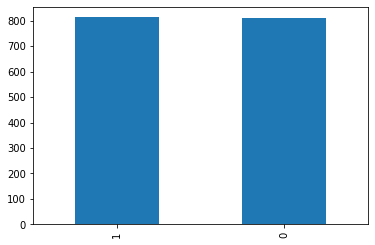

In [56]:
pd.Series(y_test).value_counts().plot(kind = 'bar')

<AxesSubplot:>

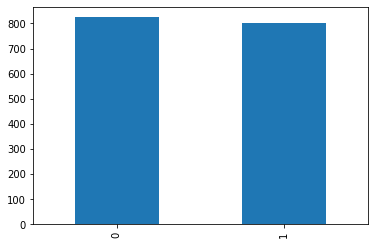

In [53]:
pd.Series(y_hat).value_counts().plot(kind = 'bar')

In [25]:
from sklearn import metrics

tree_metrics = metrics.confusion_matrix(y_test, y_hat)
print(tree_metrics)


tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)
# 0 : 식용, 1 : 독성

[[801  11]
 [ 23 790]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       812
           1       0.99      0.97      0.98       813

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [26]:
mush_class = ['poisonous', 'edible']

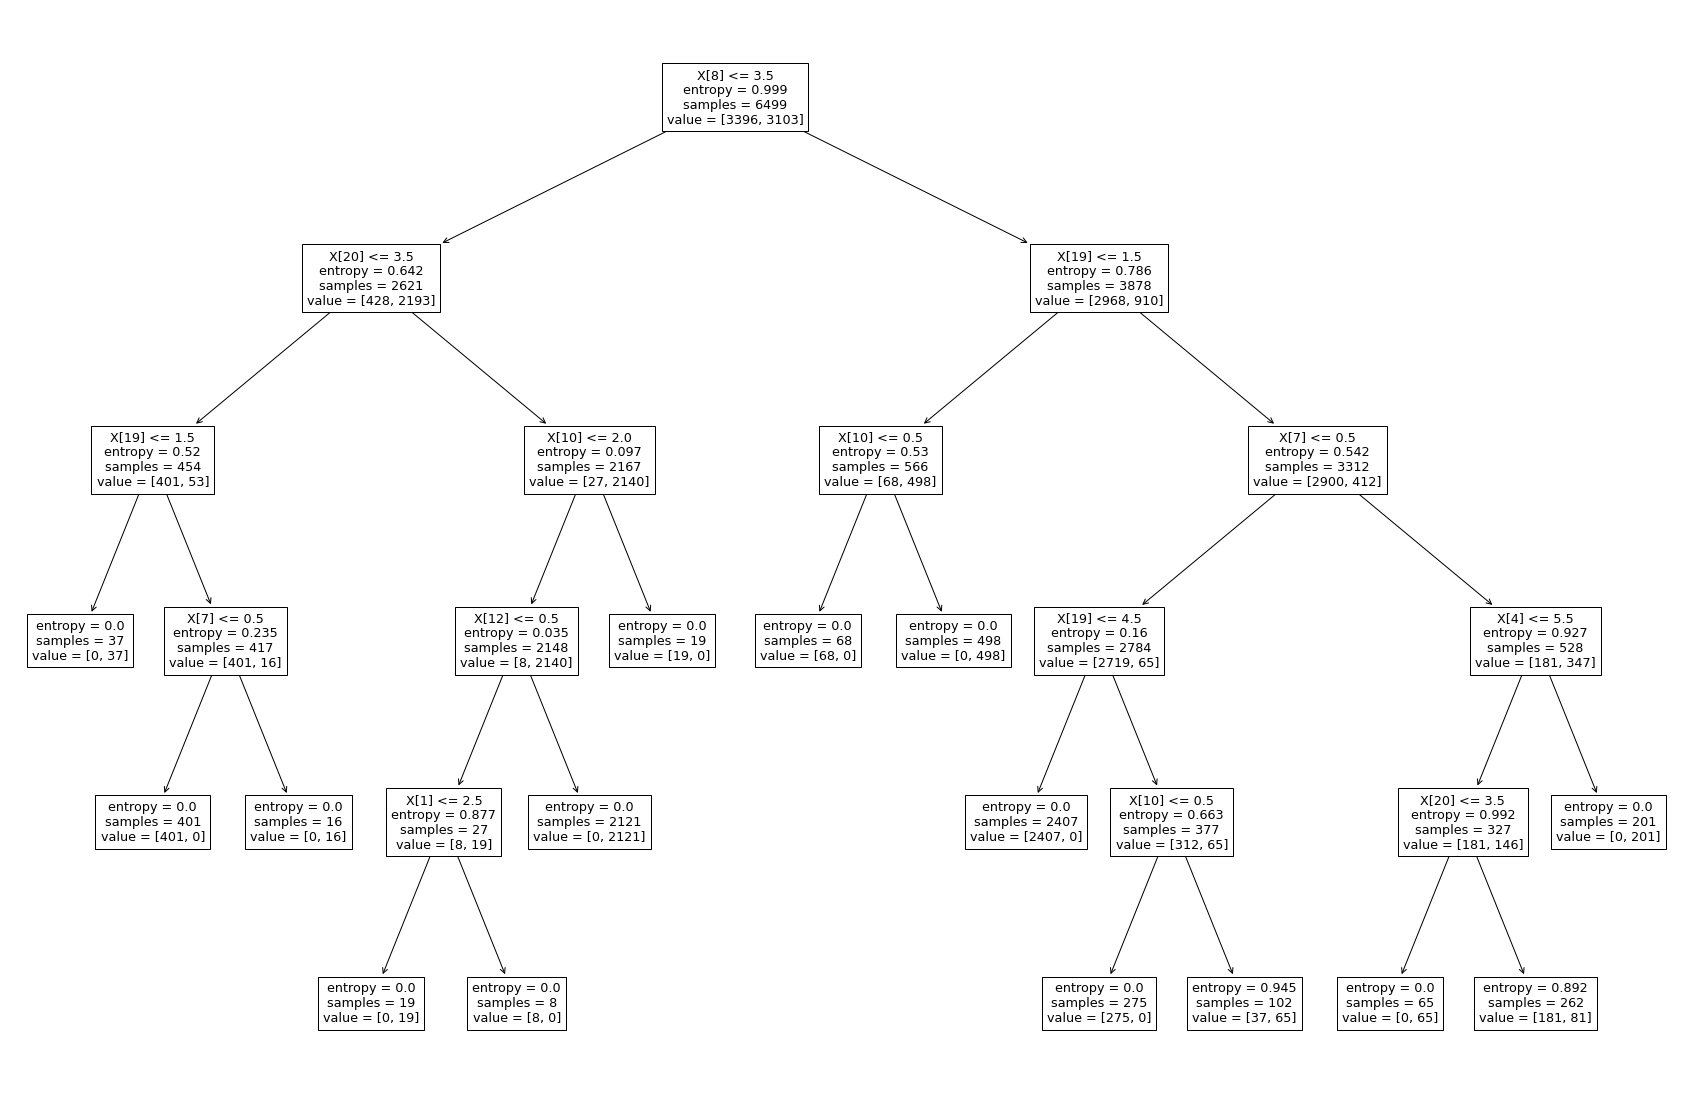

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

tree.plot_tree(tree_model)

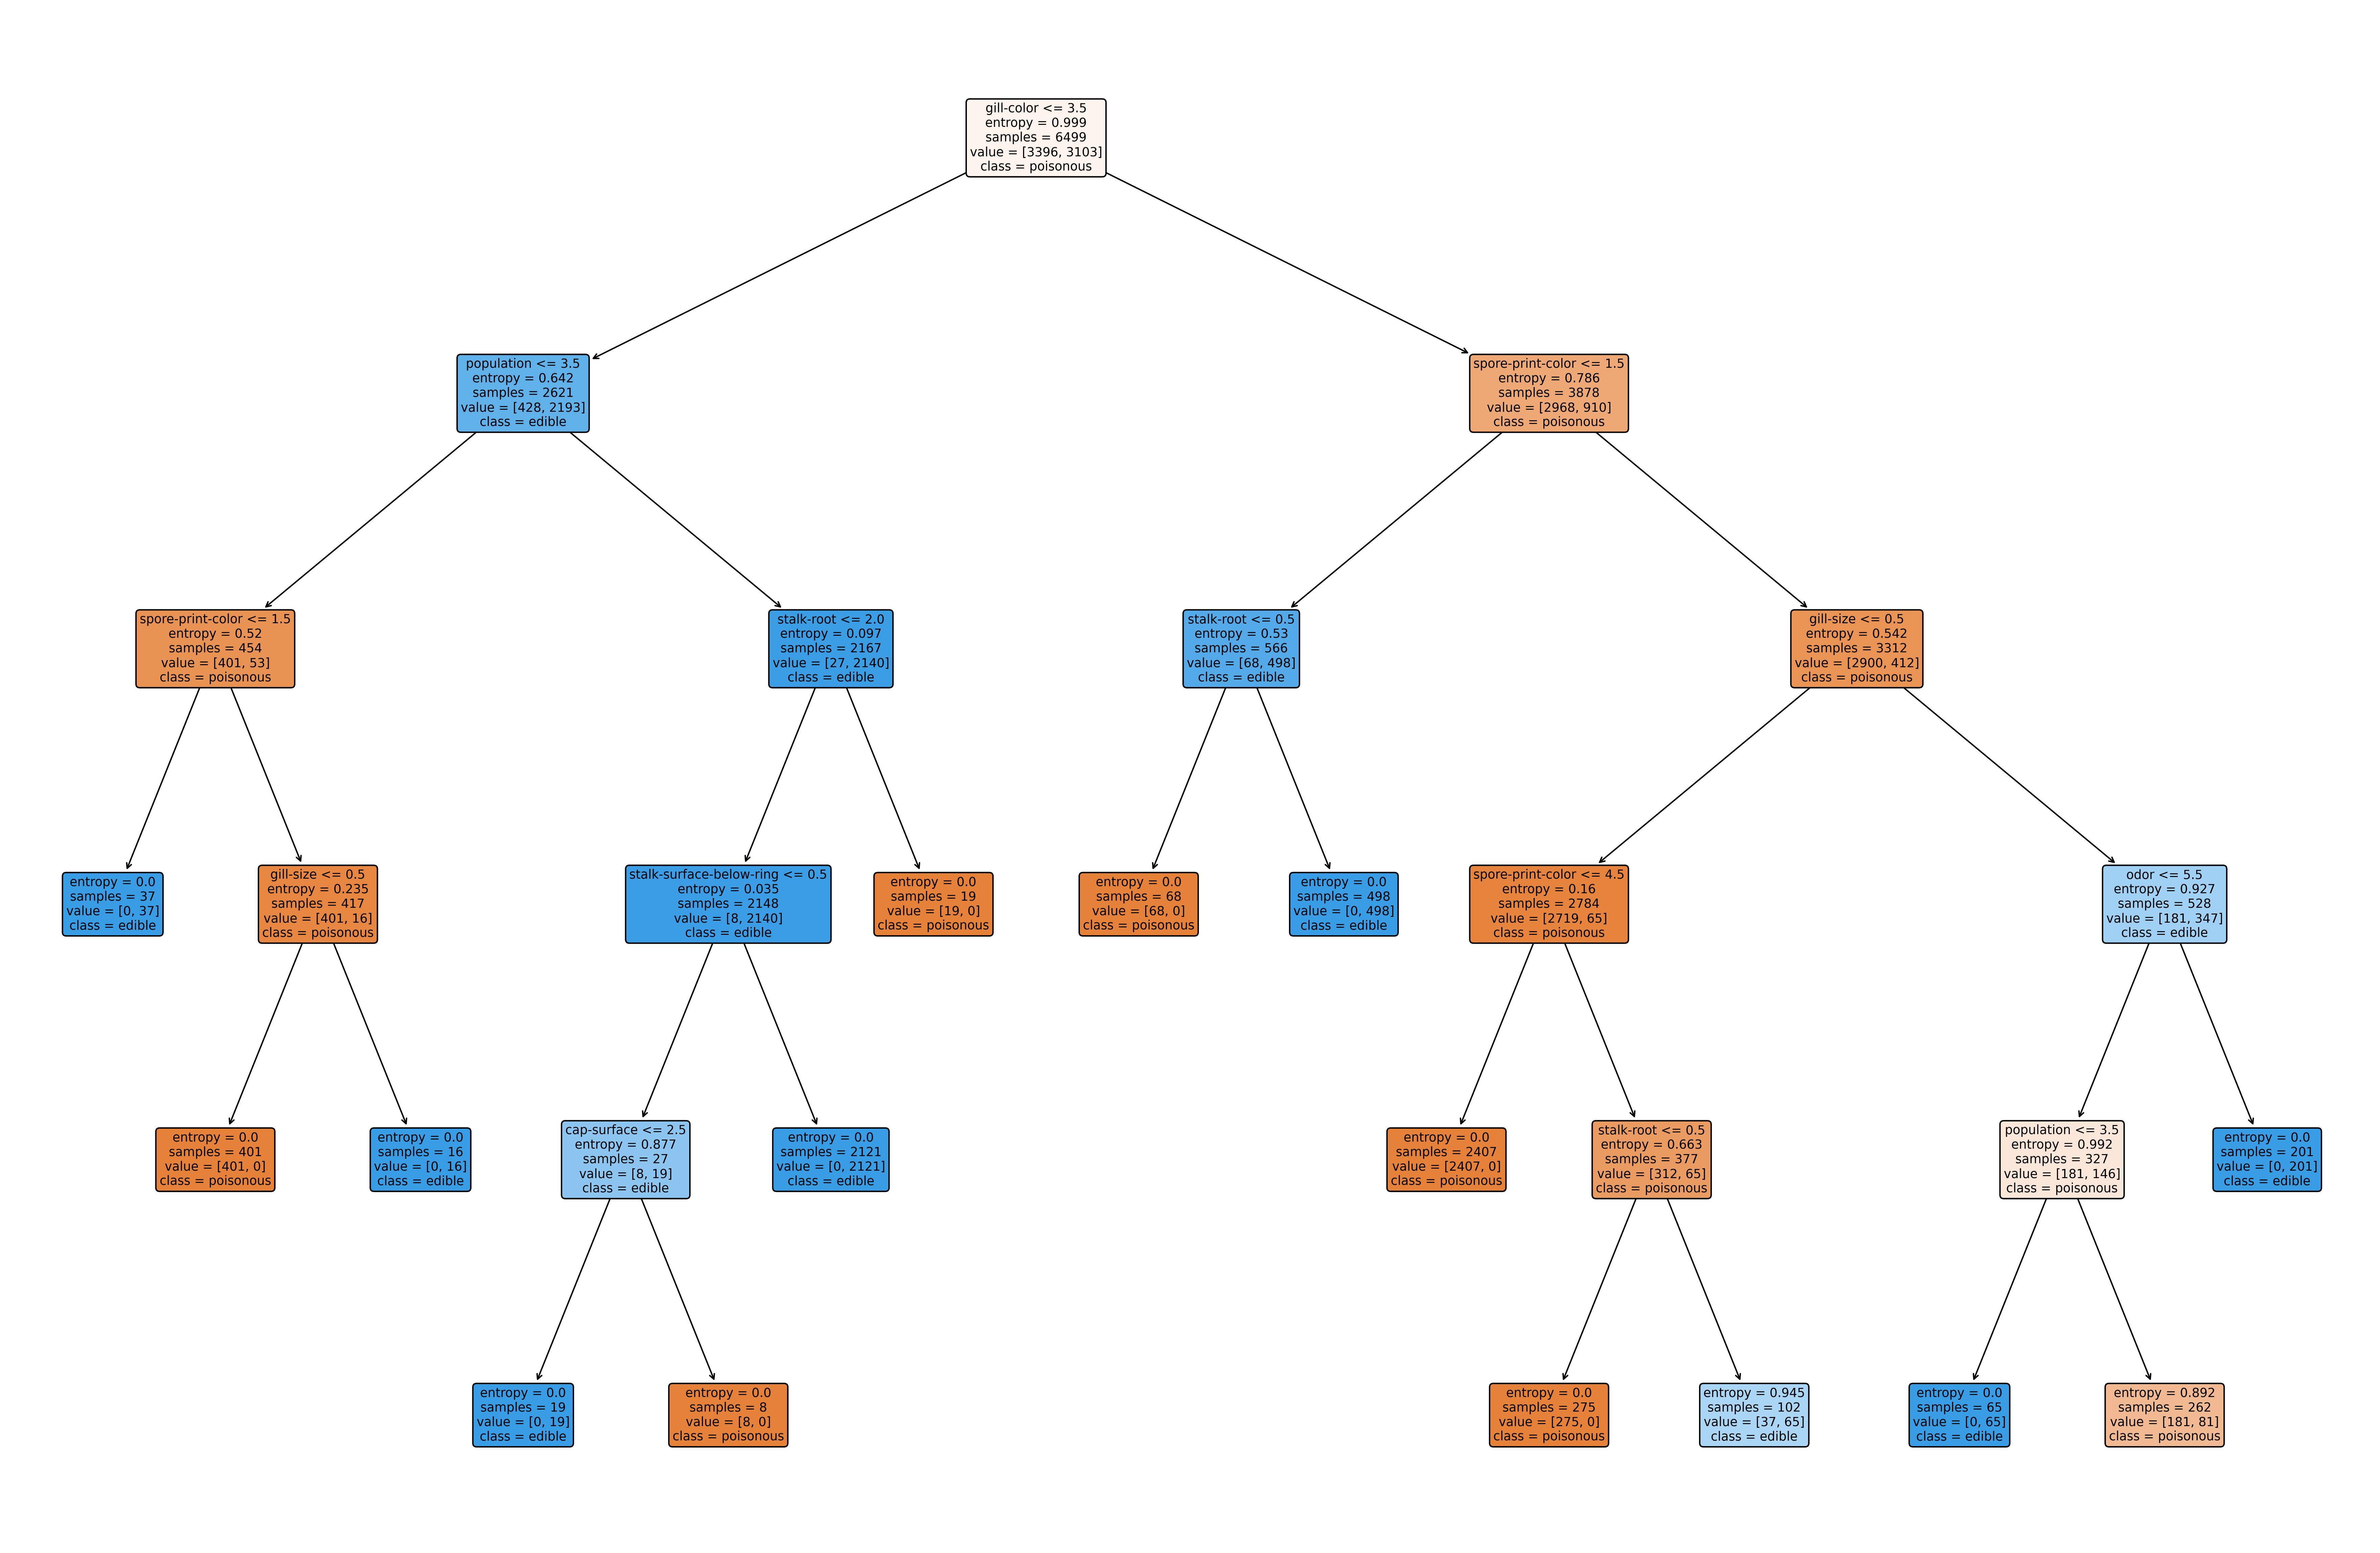

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20), dpi = 300)

tree.plot_tree(tree_model,
               feature_names = mush.columns[1:], # feature 이름 지정
               class_names = mush_class, # class 이름 지정
               rounded=True, # 모서리를 둥글게
               filled=True) # 사각형 안에 색상 채우기);
plt.savefig("tree.png")

## Logistic regression

In [57]:
X = X_pd.iloc[:,:3]
X

,cap-shape,cap-surface,cap-color
0,5,2,4
1,5,2,9
2,0,2,8
3,5,3,8
4,5,2,3
...,...,...,...
8119,3,2,4
8120,5,2,4
8121,2,2,4
8122,3,3,4


In [68]:
Y_poi = (Y == 1).astype(np.int)

In [75]:
Y_poi

array([1, 0, 0, ..., 0, 1, 0])

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pd,Y, test_size = 0.2)

In [79]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
x2 = sm.add_constant(X_pd)
model = sm.OLS(Y, x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1117.
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:37:35   Log-Likelihood:                -367.63
No. Observations:                8124   AIC:                             779.3
Df Residuals:                    8102   BIC:                             933.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
y_pred = log_reg.predict(X_test)

In [83]:
print(y_test)
print(y_pred)

[1 0 1 ... 0 1 1]
[1 0 1 ... 0 1 1]


In [84]:
log_reg_metrics = metrics.confusion_matrix(y_test, y_pred)
print(log_reg_metrics)


log_reg_report = metrics.classification_report(y_test, y_pred)
print(log_reg_report)

[[820  38]
 [ 45 722]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       858
           1       0.95      0.94      0.95       767

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [111]:
X_cap = X_pd.iloc[:,:3]

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cap,Y, test_size = 0.2)

In [113]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [114]:
x3 = sm.add_constant(X_cap)
model = sm.OLS(Y, x3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           8.35e-65
Time:                        17:02:49   Log-Likelihood:                -5740.8
No. Observations:                8124   AIC:                         1.149e+04
Df Residuals:                    8120   BIC:                         1.152e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3062      0.018     16.560      

In [115]:
y_pred = log_reg.predict(X_test)
print(y_test)
print(y_pred)

[1 1 0 ... 0 0 1]
[0 0 1 ... 1 0 1]


In [116]:
log_reg_metrics = metrics.confusion_matrix(y_test, y_pred)
print(log_reg_metrics)


log_reg_report = metrics.classification_report(y_test, y_pred)
print(log_reg_report)

[[454 380]
 [315 476]]
              precision    recall  f1-score   support

           0       0.59      0.54      0.57       834
           1       0.56      0.60      0.58       791

    accuracy                           0.57      1625
   macro avg       0.57      0.57      0.57      1625
weighted avg       0.57      0.57      0.57      1625



In [117]:
X_cap_plus = X_pd.iloc[:,:5]

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cap_plus,Y, test_size = 0.2)

In [119]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [120]:
x4 = sm.add_constant(X_cap_plus)
model = sm.OLS(Y, x4)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     780.9
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:05:21   Log-Likelihood:                -4296.0
No. Observations:                8124   AIC:                             8604.
Df Residuals:                    8118   BIC:                             8646.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7485      0.021     35.762      

In [121]:
y_pred = log_reg.predict(X_test)
print(y_test)
print(y_pred)

[1 1 0 ... 1 0 0]
[1 1 0 ... 1 0 1]


In [122]:
log_reg_metrics = metrics.confusion_matrix(y_test, y_pred)
print(log_reg_metrics)


log_reg_report = metrics.classification_report(y_test, y_pred)
print(log_reg_report)

[[664 201]
 [164 596]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       865
           1       0.75      0.78      0.77       760

    accuracy                           0.78      1625
   macro avg       0.77      0.78      0.77      1625
weighted avg       0.78      0.78      0.78      1625

